# Simple state space model for 2pp voting intention

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Load-2pp-data-and-prepare-for-analysis" data-toc-modified-id="Load-2pp-data-and-prepare-for-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load 2pp data and prepare for analysis</a></span></li><li><span><a href="#The-model" data-toc-modified-id="The-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The model</a></span></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#2pp-Voting-Intention" data-toc-modified-id="2pp-Voting-Intention-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>2pp Voting Intention</a></span></li><li><span><a href="#House-effects" data-toc-modified-id="House-effects-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>House effects</a></span></li></ul></li></ul></div>

## Python setup

In [1]:
# Data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import arviz as az
import stan # install with pip - conda is problematic on the M1 MBP

# system imports
import pathlib

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR, COLOR_OTHER

In [2]:
# enable pystan on jupyter notebook
import nest_asyncio
nest_asyncio.apply()

In [3]:
# path to the model data
DATA_DIR = '../data'
pathlib.Path(DATA_DIR).mkdir(parents=True, exist_ok=True)
DATA_DIR += '/'

In [4]:
# plotting stuff
plt.style.use('./markgraph.mplstyle')
s_args = {'lfooter': 'Polling data from Wikipedia'}
MODEL_NAME = 'Bayesian State Space Model'

## Load 2pp data and prepare for analysis

In [5]:
# read in 2pp data; remind me, what are the column names ...
tpp = pd.read_csv(f'{DATA_DIR}two_party_preferred.csv', parse_dates=['Mean Date'], index_col=0)
tpp.columns

Index(['2pp vote L/NP', '2pp vote ALP', 'Date', 'Mean Date', 'Brand',
       'Interview mode', 'Sample size', '2pp Vote L/NP LOWESS'],
      dtype='object')

In [6]:
# Number of polls
len(tpp)

96

## The model

In [7]:
# this step typically takes around 3 minutes
fit, first_day, brand_map = common.bayes_poll_aggregation(tpp, 
                              poll_column='2pp vote L/NP',
                              date_column='Mean Date',
                              firm_column='Brand',
                              assumed_sample_size=1000,
                              num_chains=4,
                              num_samples=2_500)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

## Diagnostics

In [8]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hidden_vote_share[0],51.584,0.979,49.719,53.402,0.011,0.008,7997.0,8265.0,1.0
hidden_vote_share[1],51.570,0.976,49.754,53.440,0.011,0.008,7999.0,8299.0,1.0
hidden_vote_share[2],51.559,0.975,49.783,53.432,0.011,0.008,7932.0,8584.0,1.0
hidden_vote_share[3],51.548,0.970,49.817,53.441,0.011,0.008,7989.0,8062.0,1.0
hidden_vote_share[4],51.536,0.965,49.800,53.412,0.011,0.008,7900.0,8143.0,1.0
...,...,...,...,...,...,...,...,...,...
pHouseEffects[1],-0.054,5.931,-10.802,11.609,0.053,0.089,11637.0,4825.0,1.0
pHouseEffects[2],-0.273,5.940,-11.204,11.217,0.054,0.089,11582.0,4728.0,1.0
houseEffect[0],0.223,0.244,-0.238,0.680,0.003,0.002,8664.0,7951.0,1.0
houseEffect[1],-0.003,0.255,-0.488,0.467,0.003,0.002,7325.0,7782.0,1.0


In [9]:
# Estimated Bayesian Fraction of Missing Information ...
# Good if close to one; bad if close to zero ...
bfmi = az.bfmi(fit)
if (bfmi <= 0.5).any():
    print('Note: the BFMI could be problematic')
    print(bfmi)

In [10]:
# R-hat chain convergence diagnostic
# ESS - effective sample size (used to be n_eff)
RHAT_THRESHOLD = 1.05
ESS_THRESHOLD = 1000
rhat = az.rhat(fit)
ess = az.ess(fit)
for var in ['houseEffect', 'hidden_vote_share']:
    if (rhat[var] > RHAT_THRESHOLD).any():
        print(f'Check {var} - chain convergence')
    if (ess[var] < ESS_THRESHOLD).any():
        print(f'Check {var} - effective sample size')

array([[<AxesSubplot:title={'center':'houseEffect'}>,
        <AxesSubplot:title={'center':'houseEffect'}>]], dtype=object)

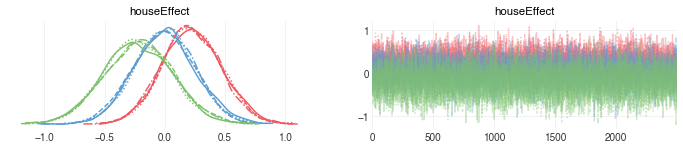

In [11]:
az.plot_trace(fit, var_names=['houseEffect'])

## Results

### Preparation

In [12]:
results_df = fit.to_frame()

In [13]:
# a framework for quantifying where the samples lie
quants = [0.005, 0.025, 0.100, 0.250, 0.500, 0.750, 0.900, 0.975, 0.995]
LOW = 'low'
HIGH = 'high'
ranges = pd.DataFrame({
    '99%': (0.005, 0.995),
    '95%': (0.025, 0.975),
    '80%': (0.100, 0.900),
    '50%': (0.250, 0.750),
}, index=[LOW, HIGH]).T
ranges

,low,high
99%,0.005,0.995
95%,0.025,0.975
80%,0.100,0.900
50%,0.250,0.750


### 2pp Voting Intention

In [14]:
# Get the daily hidden vote share data
hvs = (
    results_df[
        results_df.columns[
            results_df.columns.str.contains('hidden_vote_share')
        ]
    ]
)
hvs.columns = pd.date_range(start=first_day, freq='D', 
                            periods=len(hvs.columns))
hvs = hvs.quantile(quants)

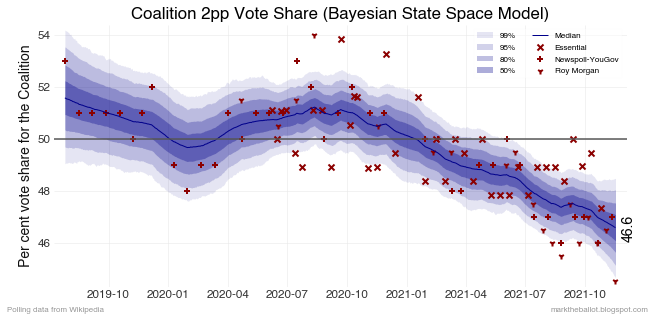

In [15]:
# Plot the daily hidden vote share data
fig, ax = common.initiate_plot()
alpha = 0.1
for x, y in ranges.iterrows():
    low = y[0]
    high = y[1]
    lowpoint = hvs.loc[low]
    highpoint = hvs.loc[high]
    ax.fill_between(x=lowpoint.index, y1=lowpoint, y2=highpoint,
                    color=COLOR_COALITION, alpha = alpha,label=x,)
    alpha += 0.075
    
ax.plot(hvs.columns, hvs.loc[0.500], 
        color=COLOR_COALITION, lw=1, label='Median')

# annotate end-point median to one devimal place ...
ax.text(hvs.columns[-1] + pd.Timedelta(days=10), 
        hvs.loc[0.500][-1], 
        f'{hvs.loc[0.500].round(1)[-1]}',
        rotation=90, ha='left', va='center',
        fontsize=14)

ax.axhline(y=50, c='#555555', lw=1.5)

brand_col = 'Brand'
markers = ['x', '+', '1', '2', '3', '4', '<', '>', '^', 'v', 'o', 's', '*', ]
for i, brand in enumerate(sorted(tpp[brand_col].unique())):
    subset = tpp.loc[tpp[brand_col] == brand]
    if not len(subset):
        continue # ignore empty subsets
    ax.scatter(subset['Mean Date'], subset['2pp vote L/NP'], 
               marker=markers[i], label=brand,
               color='darkred')

ax.legend(loc='best', ncol=2)
    
common.plot_finalise(ax, 
                     title=f'Coalition 2pp Vote Share ({MODEL_NAME})',
                     ylabel='Per cent vote share for the Coalition',
                     **s_args,
                    )

### House effects

In [16]:
# get the house effects data
house_effects = results_df[results_df.columns[results_df.columns.str.contains('houseEffect')]]

# map the ugly column names back to something meaningful
house_effects.columns = (
    house_effects.columns
    .str.extract(r'([\d]+)$')
    .pipe(lambda x: x[x.columns[0]])
    .astype(int)
    .map(brand_map)
)

# get sample quants
house_effects = house_effects.quantile(quants)

0
Essential          0.218323
Newspoll-YouGov   -0.001866
Roy Morgan        -0.224346
Name: 0.5, dtype: float64


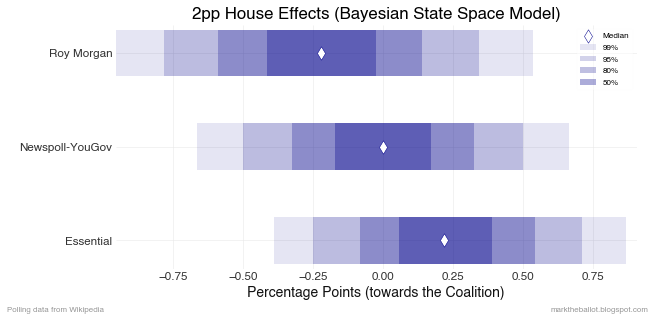

In [17]:
# plot the house effects data
fig, ax = common.initiate_plot()

for i, house in enumerate(house_effects.columns):
    alpha = 0.1
    for x, y in ranges.iterrows():
        low = y[0]
        high = y[1]
        lowpoint = house_effects.loc[low, house]
        width = house_effects.loc[high, house] - lowpoint
        label = x if i == 0 else None
        ax.barh(y=house, left=lowpoint, width=width, 
                height=0.5, color=COLOR_COALITION, alpha=alpha,
                label=label)
        alpha += 0.075

ax.scatter(y=range(len(house_effects.columns)), 
           x=house_effects.loc[0.500],
           marker='d', facecolor='white',
           edgecolor=COLOR_COALITION, 
           linewidth=0.5, zorder=2,
           label='Median', s=90)

print(house_effects.loc[0.500])
ax.legend(loc='best')

common.plot_finalise(ax, 
                     title=f'2pp House Effects ({MODEL_NAME})',
                     xlabel='Percentage Points (towards the Coalition)',
                     **s_args, )
